### PROJET PERSONNEL: LES DONNÉES UTILISÉES SONT CELLES DU CANADA SUR LA PARITE DES TAUX D'INTERET

In [139]:
import numpy as np
import pandas as pd

In [117]:
#Importation de la base de données
Data=pd.read_excel("Data.xlsx") # ce sont les données de InterestRateParityData de la Banque du Canada

In [118]:
Data.head()

,Date,PX_BID_spot,PX_ASK_spot,PX_MID_spot,PX_BID_For_p,PX_ASK_For_p,PX_MID_For_p,PX_BID_Out_For,PX_ASK_Out_For,PX_MID_Out_For,PX_LAST_Euro,PX_LAST_Dollars
0,2002-01-02,0.9031,0.9036,0.9033,-31.90,-31.60,-31.750,0.899910,0.900440,0.900125,3.279,1.86375
1,2002-01-03,0.8986,0.8991,0.8989,-32.35,-31.85,-32.100,0.895365,0.895915,0.895690,3.272,1.87563
2,2002-01-04,0.8947,0.8952,0.8949,-32.70,-32.55,-32.625,0.891430,0.891945,0.891638,3.292,1.87000
3,2002-01-07,0.8926,0.8936,0.8931,-34.40,-32.10,-33.250,0.889160,0.890390,0.889775,3.312,1.87000
4,2002-01-08,0.8929,0.8935,0.8932,-34.80,-32.50,-33.650,0.889420,0.890250,0.889835,3.311,1.84250


In [119]:
Data.dtypes

Date               datetime64[ns]
PX_BID_spot               float64
PX_ASK_spot               float64
PX_MID_spot               float64
PX_BID_For_p              float64
PX_ASK_For_p              float64
PX_MID_For_p              float64
PX_BID_Out_For            float64
PX_ASK_Out_For            float64
PX_MID_Out_For            float64
PX_LAST_Euro              float64
PX_LAST_Dollars           float64
dtype: object

### Description des variables

In [120]:
# Les taux de change spot : PX_BID_spot;  PX_ASK_spot;   PX_MID_spot;
 
# Les taux de change forward : PX_BID_For_p; PX_ASK_For_p; PX_MID_For_p;

# Les taux de change à terme: PX_BID_Out_For; PX_ASK_Out_For; PX_MID_Out_For;

#  Le taux d'interet Euro à 3 mois:  PX_LAST_Euro     
   
#  Le taux d'interet $US à 3 mois : PX_LAST_Dollars       
   

### Calcul des Déviations de la parité couverte des taux d'intérêt

In [121]:
# les taux PX_LAST_Euro et PX_LAST_Dollars sont annualisé nous allons calculer les taux équivalent de 3mois

Data["PX_LAST_Euro_3mois"]=Data["PX_LAST_Euro"]*(90/360)/100

Data["PX_LAST_Dollars_3mois"]=Data["PX_LAST_Dollars"]*(90/360)/100


In [122]:
Data["Déviation"]=(Data["PX_MID_Out_For"]/Data["PX_MID_spot"])-((1+(Data["PX_LAST_Dollars_3mois"]))/(1+(Data["PX_LAST_Euro_3mois"])))

In [123]:
Data.head()

,Date,PX_BID_spot,PX_ASK_spot,PX_MID_spot,PX_BID_For_p,PX_ASK_For_p,PX_MID_For_p,PX_BID_Out_For,PX_ASK_Out_For,PX_MID_Out_For,PX_LAST_Euro,PX_LAST_Dollars,PX_LAST_Euro_3mois,PX_LAST_Dollars_3mois,Déviation
0,2002-01-02,0.9031,0.9036,0.9033,-31.90,-31.60,-31.750,0.899910,0.900440,0.900125,3.279,1.86375,0.008197,0.004659,-0.000006
1,2002-01-03,0.8986,0.8991,0.8989,-32.35,-31.85,-32.100,0.895365,0.895915,0.895690,3.272,1.87563,0.008180,0.004689,-0.000108
2,2002-01-04,0.8947,0.8952,0.8949,-32.70,-32.55,-32.625,0.891430,0.891945,0.891638,3.292,1.87000,0.008230,0.004675,-0.000120
3,2002-01-07,0.8926,0.8936,0.8931,-34.40,-32.10,-33.250,0.889160,0.890390,0.889775,3.312,1.87000,0.008280,0.004675,-0.000148
4,2002-01-08,0.8929,0.8935,0.8932,-34.80,-32.50,-33.650,0.889420,0.890250,0.889835,3.311,1.84250,0.008278,0.004606,-0.000126


In [124]:
# Essayons de visualiser les déviations
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': "COURBE DES DEVIATIONS DE LA PARITE COUVERTE DES TAUX D'INTERETS"}, xlabel="Année d'observation", ylabel='Déviation'>

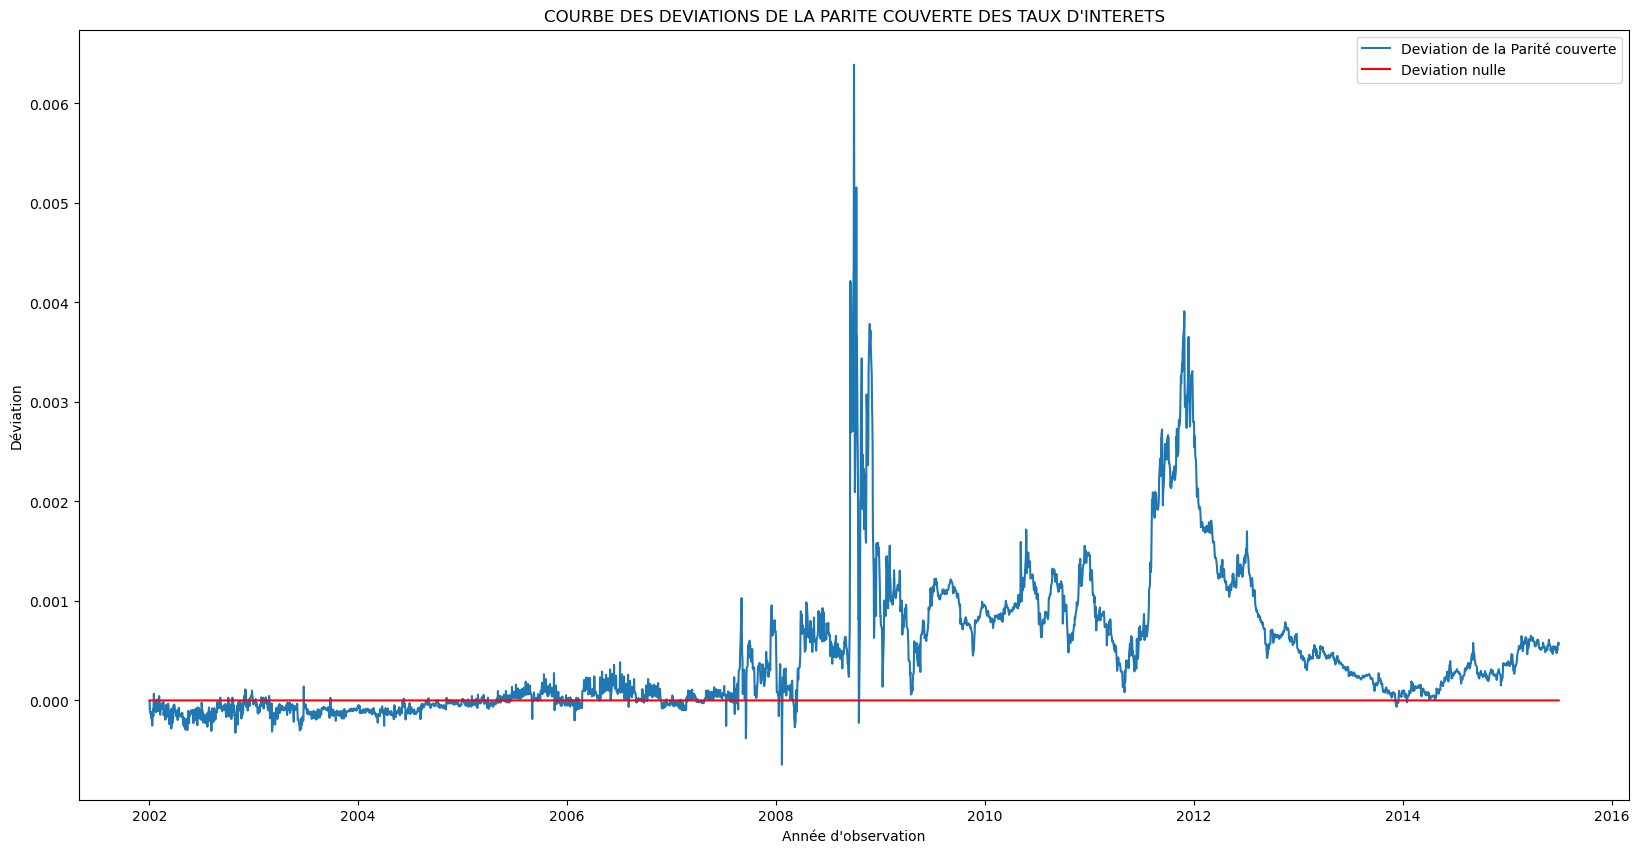

In [125]:
plt.figure(figsize=(20,10))
sns.lineplot(x=Data["Date"],y=Data["Déviation"],label="Deviation de la Parité couverte")
plt.xlabel("Année d'observation")
plt.title("COURBE DES DEVIATIONS DE LA PARITE COUVERTE DES TAUX D'INTERETS")
sns.lineplot(x=Data["Date"],y=0,color="r",label="Deviation nulle")

## *Interpretation:*

### Ce graphique présente les déviations de la parité couverte des taux d’intérêt entre Janvier 2002 et Juin 2015. Nous remarquons que les d´eviations sont très proches de zéro de janvier 2002 à janvier 2008 (période de la crise financière). Après la crise nous observons une déviation positive presque dans toutes les périodes restantes avec un grand pique en janvier 2009 ou la déviation a dépassé 0.006

### Notons qu’une déviation àvaleur différente de zéro, nous indique que les investisseurs vont se tourner vers la devise qui leur permet de se faire un profit. Une valeur positive signifie que le taux d’intérêt du dollar est inférieur au taux d’intérêt synthétique en dollars (c’est-à-dire le taux d’intérêt obtenu en allant vers le marché extérieur: l’euro dans ce cas) et les investisseurs locaux peuvent se faire du profit à l’ext´erieur. Dans le sens inverse ou opposé, une valeur négative signifie que les investisseurs locaux peuvent se faire du profit en investissant dans leur pays.

## Simulons une strategie et essayons de calculer les profits générés

### - Empruntons 100 dollars aux USA
### - Convertissons au taux de change spot en devise Euro
### - Investissons pour 3 mois aux taux d'interêt Euro
### - Couvrons une conversion de retour en dollars en utilisant le taux de change à terme 3mois


In [126]:
# Profit_Net_Sans_CT : Profit net sans coût de transactions
# Considerons les prix PX_MID_spot
Emprunt=100
Data["Profit_Net_Sans_CT"] = ((Emprunt/Data["PX_MID_spot"])*(1+Data["PX_LAST_Euro_3mois"])*(Data["PX_MID_Out_For"]))-(Emprunt*(1+Data["PX_LAST_Dollars_3mois"]))

 # Profit_Net_Avec_CT : Profit net sans coût de transactions
    # Considerons les prix PX_ASK_spot,
    
Data["Profit_Net_Avec_CT"] = ((Emprunt/Data["PX_ASK_spot"])*(1+Data["PX_LAST_Euro_3mois"])*(Data["PX_BID_Out_For"]))-(Emprunt*(1+Data["PX_LAST_Dollars_3mois"]))   

# Determinons les ecarts entre les rofits

Data["Ecart_De_Profit"]= Data["Profit_Net_Avec_CT"]- Data["Profit_Net_Sans_CT"]
Data.head()

# Les formules utilisées sont disponible dans mon cours de Sujets Speciaux Monnaie et Banque

,Date,PX_BID_spot,PX_ASK_spot,PX_MID_spot,PX_BID_For_p,PX_ASK_For_p,PX_MID_For_p,PX_BID_Out_For,PX_ASK_Out_For,PX_MID_Out_For,PX_LAST_Euro,PX_LAST_Dollars,PX_LAST_Euro_3mois,PX_LAST_Dollars_3mois,Déviation,Profit_Net_Sans_CT,Profit_Net_Avec_CT,Ecart_De_Profit
0,2002-01-02,0.9031,0.9036,0.9033,-31.90,-31.60,-31.750,0.899910,0.900440,0.900125,3.279,1.86375,0.008197,0.004659,-0.000006,-0.000558,-0.057902,-0.057344
1,2002-01-03,0.8986,0.8991,0.8989,-32.35,-31.85,-32.100,0.895365,0.895915,0.895690,3.272,1.87563,0.008180,0.004689,-0.000108,-0.010932,-0.069721,-0.058789
2,2002-01-04,0.8947,0.8952,0.8949,-32.70,-32.55,-32.625,0.891430,0.891945,0.891638,3.292,1.87000,0.008230,0.004675,-0.000120,-0.012066,-0.069101,-0.057035
3,2002-01-07,0.8926,0.8936,0.8931,-34.40,-32.10,-33.250,0.889160,0.890390,0.889775,3.312,1.87000,0.008280,0.004675,-0.000148,-0.014881,-0.140481,-0.125599
4,2002-01-08,0.8929,0.8935,0.8932,-34.80,-32.50,-33.650,0.889420,0.890250,0.889835,3.311,1.84250,0.008278,0.004606,-0.000126,-0.012729,-0.093286,-0.080557


### Contruisons le graphique de ces profits

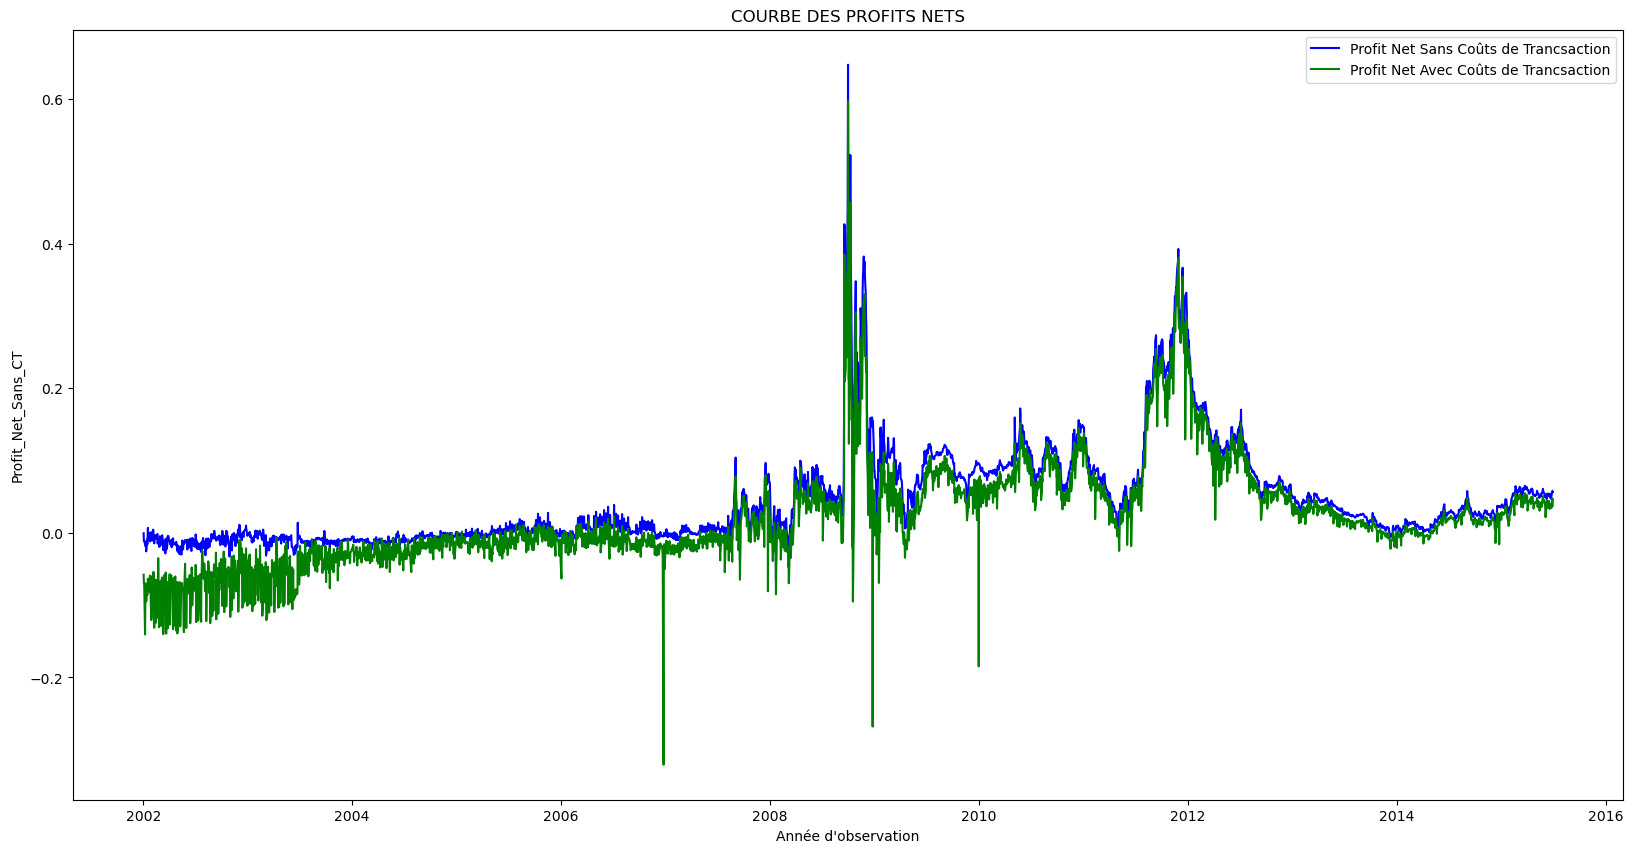

In [127]:
plt.figure(figsize=(20,10))
sns.lineplot(x=Data["Date"],y=Data["Profit_Net_Sans_CT"],color="b",label="Profit Net Sans Coûts de Trancsaction")
sns.lineplot(x=Data["Date"],y=Data["Profit_Net_Avec_CT"],color="g",label="Profit Net Avec Coûts de Trancsaction")
plt.xlabel("Année d'observation")
plt.title("COURBE DES PROFITS NETS")
plt.legend()

## Interpretation :


### Ce graphique présente les profits nets sans coût de transactions et les profits nets avec coût de transaction entre janvier 2002 et Juin 2015. Nous remarquons une l´egère difference entre le niveau des courbes des profits qui est certainement due aux coût de transactions. Mais en general, notons que les courbes ont une meme forme et allure à part quelques pics à la baisse età des dates très precises. 
### On pourrait conclure que les profits survivent aux coût de transactions mais pas dans les mêmes proportions.

### Ces remarques nous renvoyent vers l'introduction de l'article de Du et al. (2018) : "Deviations from Covered Interest Rate Parity" qui suggere quelques raisons pour expliquer ce phenomene.
#### - Les déséquilibres de l’épargne et de l’investissement entre les devises peuvent expliquer la relation systématique entre les taux d’intérêt de base et les taux d’intérêt  nominaux
#### - La rationalisation de l’interaction entre une intermédiation financière coûteuse et les déséquilibres internationaux de l’offre de financement decide de l’opportunité d’arbitrage. Cette opportunité ne s’explique pas, par le risque de crédit ou les coûts de transaction car les prêteurs sont compensés pour le différentiel de risque de crédit puis l’utilisation des contrats à terme ou du swap permet de couvrir le risque de change.

## REGRESSION LENEAIRE

In [128]:
Data["y"] = np.log(Data["PX_MID_Out_For"])- np.log(Data["PX_MID_spot"])# la variable dependante
Data["x"] = Data["PX_LAST_Dollars_3mois"]- Data["PX_LAST_Euro_3mois"]# la variable independante 

In [129]:
# Nous allons scinder notre base de données en 2 parties:


# Du debut de la periode jusqu'en decembre 2007
Data_1=Data[Data["Date"]<= "2007-12-31"]

# Deuxieme base de 2008 jusqu'à la fin de la periode
Data_2=Data[Data["Date"] >= "2008-01-01"]



In [130]:
import statsmodels.api as sm

## MODELISATION GROUPE 1: 2002-2007

In [131]:
# Ajout de la constante pour l'intercept (même si théoriquement ici intercept=0)
X = sm.add_constant(Data_1["x"])

# Régression MCO avec statsmodels
model = sm.OLS(Data_1["y"], X).fit()

# Affichage des résultats
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.194e+06
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:19:33   Log-Likelihood:                 11806.
No. Observations:                1564   AIC:                        -2.361e+04
Df Residuals:                    1562   BIC:                        -2.360e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.995e-05   3.27e-06     -9.161      0.0

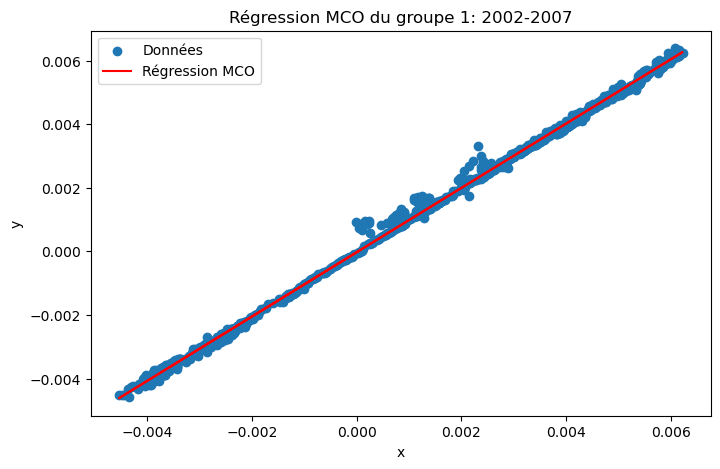

In [132]:
# Visualisation des résultats
plt.figure(figsize=(8,5))
plt.scatter(Data_1["x"], Data_1["y"], label="Données")  # Données réelles
plt.plot(Data_1["x"], model.predict(X), color="red", label="Régression MCO")  # Prédiction
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression MCO du groupe 1: 2002-2007")
plt.legend()
plt.show()

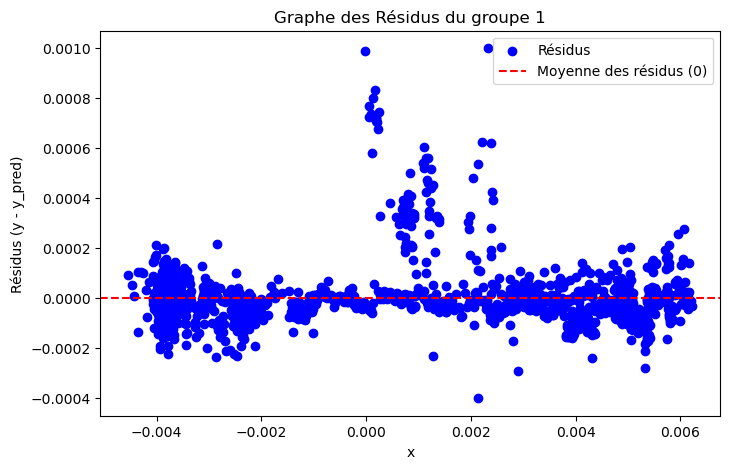

In [133]:
# GHAPHES DES RESIDUS
# Calcul des prédictions et des résidus
y_pred = model.predict(X)
residuals = Data_1["y"] - y_pred

# Tracé du graphe des résidus
plt.figure(figsize=(8,5))
plt.scatter(Data_1["x"], residuals, color="blue", label="Résidus")
plt.axhline(y=0, color="red", linestyle="--", label="Moyenne des résidus (0)")
plt.xlabel("x")
plt.ylabel("Résidus (y - y_pred)")
plt.title("Graphe des Résidus du groupe 1")
plt.legend()
plt.show()

## INTERPRETATION GROUPE 1 :

In [134]:
# Determinons la statistique observée
import scipy.stats as stats

# Degrés de liberté
df1 = 1  # Numérateur
df2 = 1562  # Dénominateur

# Niveau de confiance (par exemple, 95%)
alpha = 0.05
f_crit = stats.f.ppf(1 - alpha, df1, df2)

print(f"Valeur critique de F({df1}, {df2}) au niveau {100*(1-alpha)}% : {f_crit}")

Valeur critique de F(1, 1562) au niveau 95.0% : 3.8474190178972583


### R-squared et  R-squared ajusté sont proche de 1  et la statisque de Fisher F(1; 1562) est significative car la statistique calculée (1.194e+06) est supérieure à celle observée (3.847) et la probabilité associée à la statistique de Fisher est inférieur à 5%. Le modèle est generalement bien estimé et bien spécifié.

### on pourrait tester aussi la significativité des coefficients.

### Testons l’hypothèse cont = 0. Pour tester cette hypothèse nous faisons reference au test de Student.


In [135]:
# Degrés de liberté
df = 1562

# Niveau de confiance (exemple : 95% → alpha = 0.05)
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df)  # Bilatéral

print(f"Valeur critique de t({df}) au niveau {100*(1-alpha)}% (bilatéral) : {t_crit}")

Valeur critique de t(1562) au niveau 95.0% (bilatéral) : 1.9614838816307125


### En comparant la valeur absolue du tStat obtenu (|−9.1609|) avec tstat lu dans la table de Student à 1562 degré de liberté avec une probabilité de 5% (1.961) on peut conclure que le coeficient cont est significativement différent de 0 indiquant peut-être la présence des coûts de transaction.

### Testons l’hypothèse bêta = 1, Avec beta le coefficient de x. Pour tester cette hypothèse nous faisons reference au test de Student.

In [136]:
# Determinons le tStat correspondant
tStat_bêta=(1.0121-1)/0.001 
tStat_bêta

12.1

### Cette valeur est supérieure à 1.645 Donc le coeficient bêta est significativement différent de 1. Donc on pourrait conclure que le taux à terme est un prédicteur du taux de change futur au comptant.

## Testons l'autocorrelations des erreurs:

### La statistique de DURBIN WATSON est de 0.284. Cette valeur est plus petit que 2, preuve que les résidus sont positivement autocorrelés. Reciproquement il n’existe pas d’autocorrelation negative entre les résidus car 4 − 0.284 = 3.716

### A partir de la representation des résidus (voir Graphe des résidus) on pourrait confirmer que le modéle est bien defini. En effet,les distributions sont faites generalement autour de la droite d’équation y=0 puis nous observons une orientation et une distribution linéaire pour la majorité des r´esidus.

## MODELISATION GROUPE 2: 2008-2015

In [145]:
# Ajout de la constante pour l'intercept (même si théoriquement ici intercept=0)
X = sm.add_constant(Data_2["x"])

# Régression MCO avec statsmodels
model = sm.OLS(Data_2["y"], X).fit()

# Affichage des résultats
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8088.
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:49:52   Log-Likelihood:                 11481.
No. Observations:                1956   AIC:                        -2.296e+04
Df Residuals:                    1954   BIC:                        -2.295e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006   1.93e-05     33.202      0.0

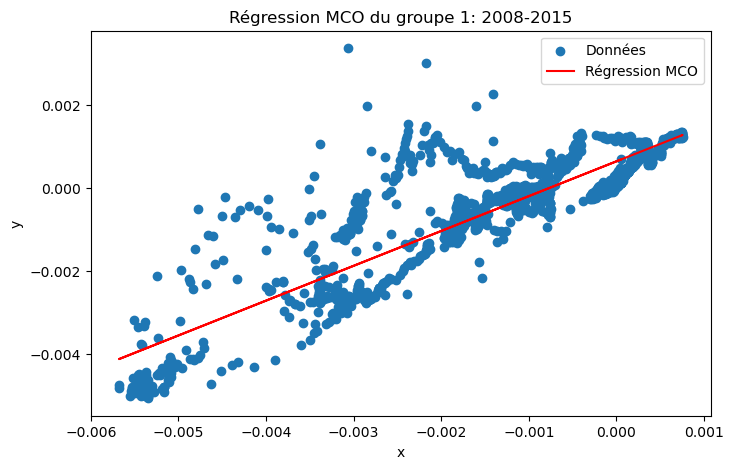

In [141]:
# Visualisation des résultats
plt.figure(figsize=(8,5))
plt.scatter(Data_2["x"], Data_2["y"], label="Données")  # Données réelles
plt.plot(Data_2["x"], model.predict(X), color="red", label="Régression MCO")  # Prédiction
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression MCO du groupe 1: 2008-2015")
plt.legend()
plt.show()

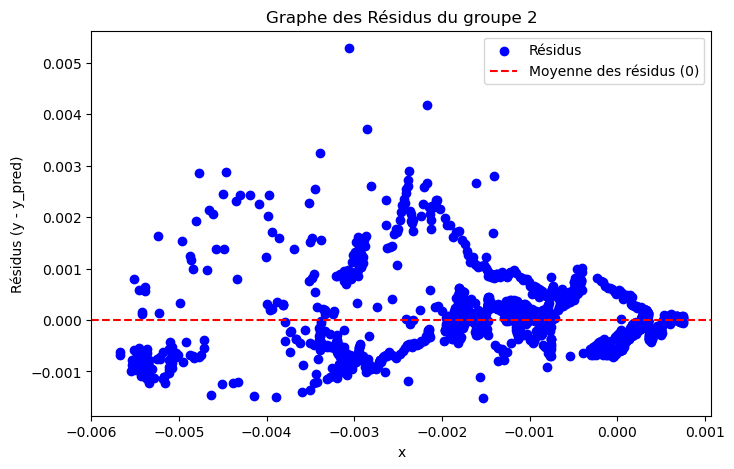

In [142]:
# GHAPHES DES RESIDUS
# Calcul des prédictions et des résidus
y_pred = model.predict(X)
residuals = Data_2["y"] - y_pred

# Tracé du graphe des résidus
plt.figure(figsize=(8,5))
plt.scatter(Data_2["x"], residuals, color="blue", label="Résidus")
plt.axhline(y=0, color="red", linestyle="--", label="Moyenne des résidus (0)")
plt.xlabel("x")
plt.ylabel("Résidus (y - y_pred)")
plt.title("Graphe des Résidus du groupe 2")
plt.legend()
plt.show()

# INTERPRETATION GROUPE 2 :

In [143]:
# Determinons la statistique observée
import scipy.stats as stats

# Degrés de liberté
df1 = 1  # Numérateur
df2 = 1954  # Dénominateur

# Niveau de confiance (par exemple, 95%)
alpha = 0.05
f_crit = stats.f.ppf(1 - alpha, df1, df2)

print(f"Valeur critique de F({df1}, {df2}) au niveau {100*(1-alpha)}% : {f_crit}")

Valeur critique de F(1, 1954) au niveau 95.0% : 3.846222219253837


### R-squared et  R-squared ajusté sont proche de 1  et la statisque de Fisher F(1; 1954) est significative car la statistique calculée (8088.0) est supérieure à celle observée (3.846) et la probabilité associée à la statistique de Fisher est inférieure à 5%. Le modèle est generalement bien estimé et bien spécifié.

### Testons l’hypothèse cont = 0. Pour tester cette hypothèse nous faisons reference au test de Student.

In [144]:
# Degrés de liberté
df = 1954

# Niveau de confiance (exemple : 95% → alpha = 0.05)
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df)  # Bilatéral

print(f"Valeur critique de t({df}) au niveau {100*(1-alpha)}% (bilatéral) : {t_crit}")

Valeur critique de t(1954) au niveau 95.0% (bilatéral) : 1.9611787830928074


### En comparant la valeur absolue du tStat obtenu (33.202) avec tstat lu dans la table de Student à 1954 degré de liberté avec une probabilité de 5% (1.961) on peut conclure que le coeficient cont est significativement différent de 0 indiquant peut-être la présence des coûts de transaction.

### Testons l’hypothèse bêta = 1, Avec beta le coefficient de x. Pour tester cette hypothèse nous faisons reference au test de Student.

In [147]:
# Determinons le tStat correspondant
tStat_bêta_2=(0.8380-1)/0.009  
tStat_bêta_2

-18.000000000000004

### Cette Cette valeur en valeur absolue (18.0) est supérieure à 1.941 Donc le coeficient bêta est significativement différent de 1. Le taux à terme serait un excellent prédicteur du taux de change futur au comptant.

## Testons l'autocorrelations des erreurs:

### La statistique de DURBIN WATSON est de 0.061. Cette valeur est plus petit que 2, preuve que les résidus sont positivement autocorrelés. Reciproquement il n’existe pas d’autocorrelation negative entre les résidus car 4 − 0.061 = 3.939

### A partir de la representation des résidus (voir Graphe des résidus du groupe) on pourrait confirmer que le modéle est bien defini. En effet,les distributions sont faites aléatoire mais suivant une trajectoire d'ensemble et presque orientér.

## MODELISATION DU GROUPE ENTIER : 2002-2015

In [102]:
# Ajout de la constante pour l'intercept (même si théoriquement ici intercept=0)
X = sm.add_constant(Data["x"])

# Régression MCO avec statsmodels
model = sm.OLS(Data["y"], X).fit()

# Affichage des résultats
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 5.183e+04
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:33:49   Log-Likelihood:                 20724.
No. Observations:                3520   AIC:                        -4.144e+04
Df Residuals:                    3518   BIC:                        -4.143e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004   1.15e-05     37.192      0.0

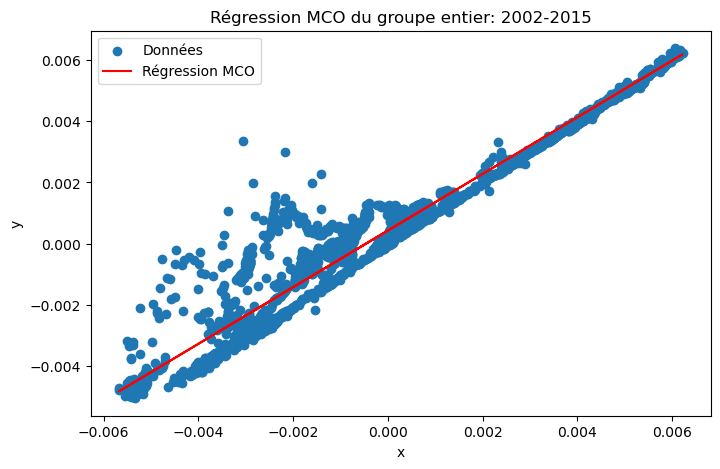

In [103]:
# Visualisation des résultats
plt.figure(figsize=(8,5))
plt.scatter(Data["x"], Data["y"], label="Données")  # Données réelles
plt.plot(Data["x"], model.predict(X), color="red", label="Régression MCO")  # Prédiction
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression MCO du groupe entier: 2002-2015")
plt.legend()
plt.show()

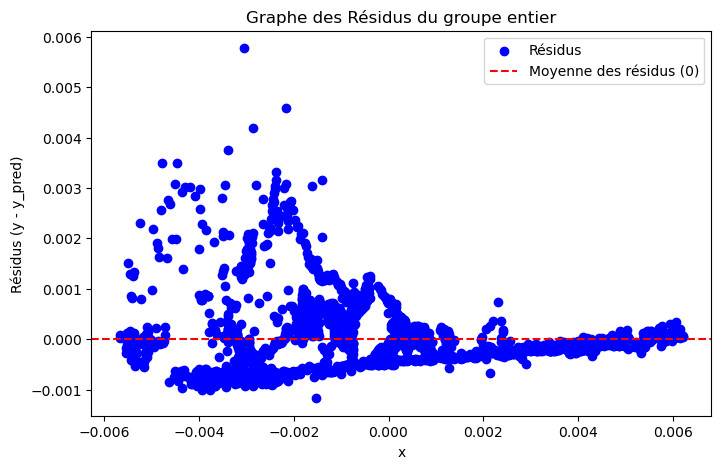

In [104]:
# GHAPHES DES RESIDUS
# Calcul des prédictions et des résidus
y_pred = model.predict(X)
residuals = Data["y"] - y_pred

# Tracé du graphe des résidus
plt.figure(figsize=(8,5))
plt.scatter(Data["x"], residuals, color="blue", label="Résidus")
plt.axhline(y=0, color="red", linestyle="--", label="Moyenne des résidus (0)")
plt.xlabel("x")
plt.ylabel("Résidus (y - y_pred)")
plt.title("Graphe des Résidus du groupe entier")
plt.legend()
plt.show()

####  *Pour les interpretations et tests d'hypothése on peut proceder de la même maniere pour expliquer les resultats obtenus